In [1]:
import numpy as np
import os
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder

import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split


#Statistical Analysis and Data Cleaning

In [ ]:
df = pd.read_csv('//content/Data Carrard et al. 2022 MedTeach.csv', delimiter = ",")

In [ ]:
df.head(3)

id  age  year  sex  glang  part  job  stud_h  health  psyt  jspe  qcae_cog  \
0   2   18     1    1    120     1    0      56       3     0    88        62   
1   4   26     4    1      1     1    0      20       4     0   109        55   
2   9   21     3    2      1     0    0      36       3     0   106        64   

   qcae_aff  amsp  erec_mean  cesd  stai_t  mbi_ex  mbi_cy  mbi_ea  
0        27    17   0.738095    34      61      17      13      20  
1        37    22   0.690476     7      33      14      11      26  
2        39    17   0.690476    25      73      24       7      23

In [ ]:
df['age'].min()

17

In [ ]:
df['sex'].unique()

array([1, 2, 3])

In [ ]:
df['glang'].nunique()

19

In [ ]:
df['job'].nunique()

2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         886 non-null    int64  
 1   age        886 non-null    int64  
 2   year       886 non-null    int64  
 3   sex        886 non-null    int64  
 4   glang      886 non-null    int64  
 5   part       886 non-null    int64  
 6   job        886 non-null    int64  
 7   stud_h     886 non-null    int64  
 8   health     886 non-null    int64  
 9   psyt       886 non-null    int64  
 10  jspe       886 non-null    int64  
 11  qcae_cog   886 non-null    int64  
 12  qcae_aff   886 non-null    int64  
 13  amsp       886 non-null    int64  
 14  erec_mean  886 non-null    float64
 15  cesd       886 non-null    int64  
 16  stai_t     886 non-null    int64  
 17  mbi_ex     886 non-null    int64  
 18  mbi_cy     886 non-null    int64  
 19  mbi_ea     886 non-null    int64  
dtypes: float64

In [ ]:
import pandas as pd
import numpy as np

df['Health groups'] = pd.cut(df['health'], [0,3,5], labels=[0,1])

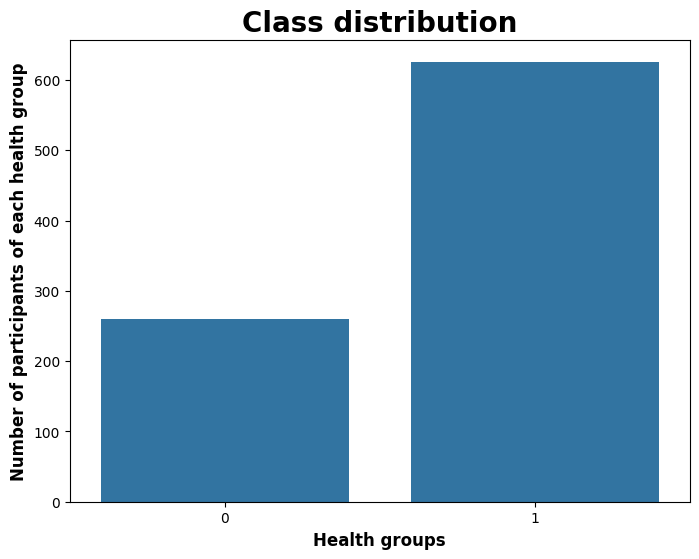

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (8, 6))
sns.countplot(ax = ax, x=df["Health groups"])
ax.set_xlabel( "Health groups" , size = 12,  weight='bold')

# Set label for y-axis
ax.set_ylabel( "Number of participants of each health group" , size = 12,  weight='bold')

# Set title for plot
ax.set_title( "Class distribution" , size = 20,  weight='bold')

# Display figure
plt.show()

In [ ]:
print(df.head(1))

   id  age  year  sex  glang  part  job  stud_h  health  psyt  ...  qcae_cog  \
0   2   18     1    1    120     1    0      56       3     0  ...        62   

   qcae_aff  amsp  erec_mean  cesd  stai_t  mbi_ex  mbi_cy  mbi_ea  \
0        27    17   0.738095    34      61      17      13      20   

   Health groups  
0              0  

[1 rows x 21 columns]


In [ ]:
Y2 = df['Health groups']
X2 = df.drop(['id' , 'health', 'Health groups'], axis = 1)
# example of a standardization
from numpy import asarray
from sklearn.preprocessing import StandardScaler


# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X2)
X2 = pd.DataFrame(scaled, columns = X2.columns)

In [ ]:
Y2.head(2)

0    0
1    1
Name: Health groups, dtype: category
Categories (2, int64): [0 < 1]

#Feature selection

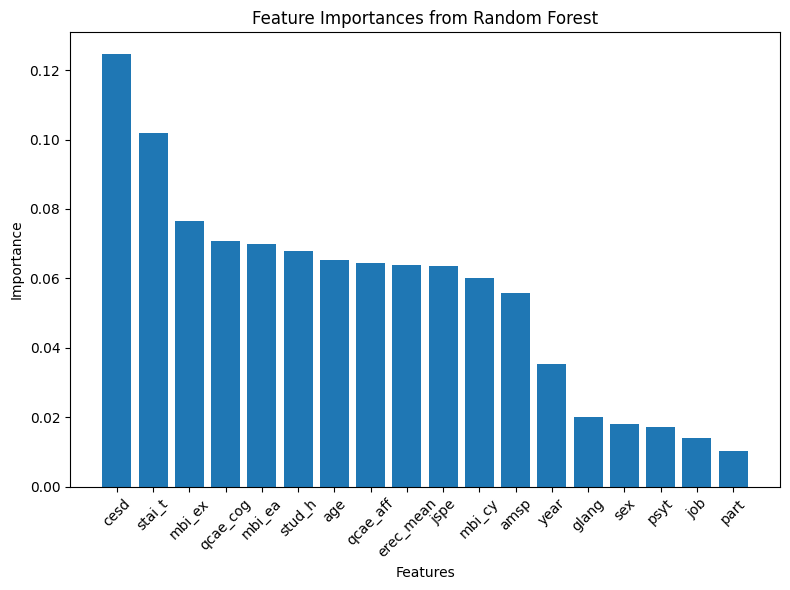

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest model on the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances with their respective column names
importance_df = pd.DataFrame({'Feature': X2.columns, 'Importance': feature_importances})

# Sort features based on their importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Mutual Information Scores:
      Feature  Mutual Information
14     stai_t            0.075048
13       cesd            0.060693
7        psyt            0.044098
17     mbi_ea            0.040494
9    qcae_cog            0.038518
15     mbi_ex            0.033243
0         age            0.023103
8        jspe            0.018028
1        year            0.016283
11       amsp            0.014960
4        part            0.012699
2         sex            0.008667
10   qcae_aff            0.006950
16     mbi_cy            0.005854
12  erec_mean            0.000882
5         job            0.000000
6      stud_h            0.000000
3       glang            0.000000

Top-2 features:
14    stai_t
13      cesd
Name: Feature, dtype: object


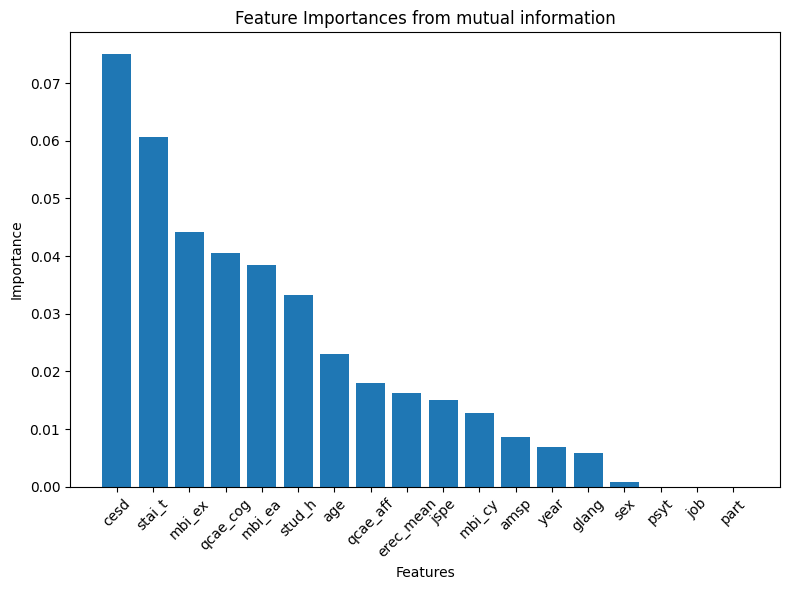

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split



# Calculate the mutual information between each feature and the target
mutual_info_scores = mutual_info_classif(X_train, y_train)

# Create a DataFrame to store the mutual information scores with their respective column names
mi_df = pd.DataFrame({'Feature': X2.columns, 'Mutual Information': mutual_info_scores})

# Sort features based on their mutual information scores (descending order)
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Print the mutual information scores for each feature
print("Mutual Information Scores:")
print(mi_df)

# Select the top-K features based on mutual information scores
K = 2
top_K_features = mi_df['Feature'][:2]

print(f"\nTop-{K} features:")
print(top_K_features)

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Feature'], mi_df['Mutual Information'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from mutual information')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Data Mining Algorithms

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X2,Y2, test_size=0.2, stratify=Y2)
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train,y_train = smote.fit_resample(x_train,y_train)



from sklearn.metrics import recall_score


In [ ]:
from collections import Counter
counter = Counter(y_train)
print(counter)

Counter({1: 500, 0: 500})


In [ ]:
y_train.unique

<bound method Series.unique of 0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Health groups, Length: 1000, dtype: category
Categories (2, int64): [0 < 1]>

In [ ]:
print(x_train.shape)

(1000, 18)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd




from sklearn.model_selection import GridSearchCV

from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

KNparams = [{'n_neighbors': list(range(2, 30))}]

clf = GridSearchCV(KNN, KNparams, cv = 10, scoring='accuracy')

clf.fit(x_train, y_train)


print(clf.best_params_)

print(clf.best_score_)


{'n_neighbors': 3}
0.759


In [ ]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
test_score = (metrics.accuracy_score(y_test, y_pred))
f1 = (sklearn.metrics.f1_score(y_test, y_pred))
p = (sklearn.metrics.precision_score(y_test, y_pred))
r = (sklearn.metrics.recall_score(y_test, y_pred))
print(test_score)
print(f1)
print(p)
print(r)



0.5842696629213483
0.6666666666666666
0.7708333333333334
0.5873015873015873


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

DT = DecisionTreeClassifier()
DT_params = [{'min_samples_split' : list(range(1, 15)), 'max_depth': list(range(10, 15)), 'max_features': list(range(0, 19)), 'min_samples_leaf': list(range(1, 3))}]

clf = GridSearchCV(DT , DT_params, cv = 10, scoring='accuracy')

clf.fit(x_train,y_train)
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 14, 'max_features': 14, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.752


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=1, min_samples_split=10, min_samples_leaf=2, max_features=11)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
test_score = (metrics.accuracy_score(y_test, y_pred))
f1 = (sklearn.metrics.f1_score(y_test, y_pred))
p = (sklearn.metrics.precision_score(y_test, y_pred))
r = (sklearn.metrics.recall_score(y_test, y_pred))
print(test_score)
print(f1)
print(p)
print(r)

0.7303370786516854
0.8248175182481752
0.7635135135135135
0.8968253968253969


In [ ]:
import sklearn

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# Create Decision Tree classifer object
max_depth = [1, 10, 20, 50, 100, 150, 200]
 #A = range(1,6)
test_score = []
from sklearn.metrics import balanced_accuracy_score
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
f1 = []
p = []
r = []
for i in max_depth:

        clf = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=10, min_samples_leaf=2, max_features=11)

# Train Decision Tree Classifer
        clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
        y_pred = clf.predict(x_test)
        test_score.append(metrics.accuracy_score(y_test, y_pred))
        f1.append(sklearn.metrics.f1_score(y_test, y_pred))
        p.append(sklearn.metrics.precision_score(y_test, y_pred))
        r.append(sklearn.metrics.recall_score(y_test, y_pred))





print((test_score))
print((f1))
print((p))
print((r))

[0.7303370786516854, 0.601123595505618, 0.6179775280898876, 0.5842696629213483, 0.6123595505617978, 0.6685393258426966, 0.601123595505618]
[0.8248175182481752, 0.7148594377510041, 0.7213114754098361, 0.6754385964912281, 0.7160493827160495, 0.7591836734693878, 0.7102040816326531]
[0.7635135135135135, 0.7235772357723578, 0.7457627118644068, 0.7549019607843137, 0.7435897435897436, 0.7815126050420168, 0.7310924369747899]
[0.8968253968253969, 0.7063492063492064, 0.6984126984126984, 0.6111111111111112, 0.6904761904761905, 0.7380952380952381, 0.6904761904761905]


In [ ]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

rfc = RandomForestClassifier()
forest_params = [{'min_samples_split' : list(range(1, 15)), 'max_depth': list(range(10, 15)), 'max_features': list(range(0, 19))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(x_train,y_train)
print(clf.best_params_)
print(clf.best_score_)


{'max_depth': 13, 'max_features': 1, 'min_samples_split': 2}
0.834


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
clf = RandomForestClassifier(max_depth=14, max_features=3, min_samples_split = 2)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
test_score = (metrics.accuracy_score(y_test, y_pred))
f1 = (sklearn.metrics.f1_score(y_test, y_pred))
p =(sklearn.metrics.precision_score(y_test, y_pred))
r = (sklearn.metrics.recall_score(y_test, y_pred))
print(f1)
print(p)
print(r)
print(test_score)

0.8270676691729324
0.7857142857142857
0.873015873015873
0.7415730337078652


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import balanced_accuracy_score


model = RandomForestClassifier(n_estimators=200, max_depth=170, max_features=11)

from sklearn.metrics import classification_report

model.fit(x_train, y_train)
y_pred = clf.predict(x_test)
test_score = (metrics.accuracy_score(y_test, y_pred))
f1 = (sklearn.metrics.f1_score(y_test, y_pred))
p = (sklearn.metrics.precision_score(y_test, y_pred))
r = (sklearn.metrics.recall_score(y_test, y_pred))

print(test_score)
print(f1)
print(p)
print(r)
print(classification_report(y_test, y_pred))





0.7303370786516854
0.813953488372093
0.7954545454545454
0.8333333333333334
              precision    recall  f1-score   support

           0       0.54      0.48      0.51        52
           1       0.80      0.83      0.81       126

    accuracy                           0.73       178
   macro avg       0.67      0.66      0.66       178
weighted avg       0.72      0.73      0.73       178



In [ ]:
from sklearn.linear_model import LogisticRegression
#Balanced class weight, penalty = l1
learner = LogisticRegression()
learner_params = {
    'penalty' : ['l1','l2'],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

clf = GridSearchCV(learner, learner_params, cv = 10, scoring='accuracy')

clf.fit(x_train,y_train)
print(clf.best_params_)
print(clf.best_score_)



{'penalty': 'l1', 'solver': 'liblinear'}
0.6439999999999999


In [ ]:
from sklearn.linear_model import LogisticRegression
#Balanced class weight, penalty = l1
learner = LogisticRegression(fit_intercept = True, penalty = 'l1', solver='liblinear')
learner.fit(x_train, y_train)
tr_pred = learner.predict(x_train)
predictions = learner.predict(x_test)


y_pred = learner.predict(x_test)
test_score = (metrics.accuracy_score(y_test, y_pred))
f1 = (sklearn.metrics.f1_score(y_test, y_pred))
p = (sklearn.metrics.precision_score(y_test, y_pred))
r = (sklearn.metrics.recall_score(y_test, y_pred))
print(test_score)
print(f1)
print(p)
print(r)

0.6741573033707865
0.7521367521367521
0.8148148148148148
0.6984126984126984


In [ ]:
from sklearn.neural_network import MLPClassifier
#Balanced class weight, penalty = l1
learner = MLPClassifier()
learner_params= {
    'hidden_layer_sizes': [(10,30,10,200),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.01],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(learner, learner_params, cv = 10, scoring='accuracy')

clf.fit(x_train,y_train)
print(clf.best_params_)
print(clf.best_score_)

{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10, 200), 'learning_rate': 'constant', 'solver': 'adam'}
0.75


In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(10,30,10,200),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.01],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
from sklearn.neural_network import MLPClassifier
learner = MLPClassifier(hidden_layer_sizes= (10, 30, 10, 200), alpha=0.05, learning_rate="constant", activation='relu', solver='adam', max_iter=500)
learner.fit(x_train, y_train)
tr_pred = learner.predict(x_train)
predictions = learner.predict(x_test)


y_pred = learner.predict(x_test)
test_score = (metrics.accuracy_score(y_test, y_pred))
f1 = (sklearn.metrics.f1_score(y_test, y_pred))
p = (sklearn.metrics.precision_score(y_test, y_pred))
r = (sklearn.metrics.recall_score(y_test, y_pred))
print(test_score)
print(f1)
print(p)
print(r)

0.7134831460674157
0.7984189723320158
0.7952755905511811
0.8015873015873016


In [ ]:
import xgboost as xgb
xgc = xgb.XGBClassifier()
xgb_params = [{'max_depth': list(range(10, 30))}]

clf = GridSearchCV(xgc, xgb_params, cv = 10, scoring='accuracy')

clf.fit(x_train,y_train)
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 16}
0.8299999999999998


In [ ]:
import xgboost as xgb #importing xgboost model from xgb library
xgc = xgb.XGBClassifier(n_estimators=500, max_depth=16, random_state=42) # Creating a XGB Classifier

xgc.fit(x_train, y_train)
y_pred = xgc.predict(x_test)
test_score = (metrics.accuracy_score(y_test, y_pred))
f1 = (sklearn.metrics.f1_score(y_test, y_pred))
p = (sklearn.metrics.precision_score(y_test, y_pred))
r = (sklearn.metrics.recall_score(y_test, y_pred))
print(test_score)
print(f1)
print(p)
print(r)

0.702247191011236
0.8
0.762589928057554
0.8412698412698413


In [ ]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the Naive Bayes classifier
nb_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(x_test)

test_score = (metrics.accuracy_score(y_test, y_pred))
f1 = (sklearn.metrics.f1_score(y_test, y_pred))
p = (sklearn.metrics.precision_score(y_test, y_pred))
r = (sklearn.metrics.recall_score(y_test, y_pred))
print(test_score)
print(f1)
print(p)
print(r)

0.7134831460674157
0.7829787234042553
0.8440366972477065
0.7301587301587301


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
AD = AdaBoostClassifier()

AD_params = [{'n_estimators': list(range(50, 100))}]

clf = GridSearchCV(AD, AD_params, cv = 10, scoring='accuracy')

clf.fit(x_train,y_train)
print(clf.best_params_)
print(clf.best_score_)

{'n_estimators': 67}
0.7180000000000001


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
AD = AdaBoostClassifier(n_estimators = 67)



# Train the model on the training data
AD.fit(x_train, y_train)

# Make predictions on the testing data
predictions = AD.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)

test_score = (metrics.accuracy_score(y_test, predictions))
f1 = (sklearn.metrics.f1_score(y_test, predictions))
p = (sklearn.metrics.precision_score(y_test, predictions))
r = (sklearn.metrics.recall_score(y_test, predictions))
print(test_score)
print(f1)
print(p)
print(r)

0.7134831460674157
0.7918367346938775
0.8151260504201681
0.7698412698412699


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ax.set_xlabel( "Health groups" , size = 12,  weight='bold')

# Set label for y-axis
ax.set_ylabel( "Number of participants of each health group" , size = 12,  weight='bold')

# Set title for plot
ax.set_title( "Class distribution" , size = 20,  weight='bold')

# Display figure
plt.show()

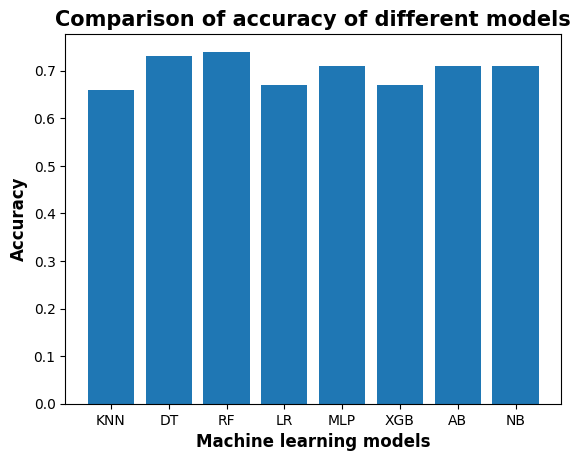

In [ ]:
Accuracy = [0.66,0.73,0.74,0.67,0.71,0.67,0.71,0.71]
Model = ['KNN', 'DT', 'RF', 'LR', 'MLP', 'XGB', 'AB', 'NB']
plt.bar(Model, Accuracy)
plt.xlabel("Machine learning models", size = 12,  weight='bold')

plt.ylabel("Accuracy", size = 12,  weight='bold')
plt.title("Comparison of accuracy of different models", size = 15,  weight='bold')
plt.show()


['C', 'C++', 'Java', 'Python']
[20, 15, 30, 35]


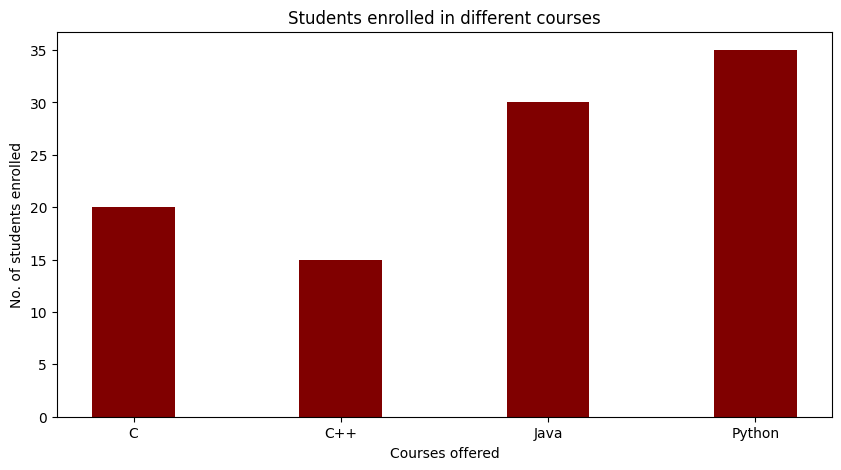

In [ ]:

import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'C':20, 'C++':15, 'Java':30,
        'Python':35}
courses = list(data.keys())
values = list(data.values())

print(courses)
print(values)

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)

plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

#Explainability

#SHAP

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)


In [ ]:
pip install shap

In [ ]:
import pandas as pd
import shap
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# ✅ Step 1: Load data
data = pd.read_csv('/content/data.csv', delimiter=';')

# ✅ Step 2: Check column names and assign proper types
print("Column names:", data.columns)

# ✅ Step 3: Set correct target column name (update if different)
target_column = 'Target'  # ← change if needed

# ✅ Step 4: Split x and y with named columns
x = data.drop(columns=[target_column])
y = data[target_column]
data["Target"].replace({"Dropout": 0,"Graduate": 1, "Enrolled": 2}, inplace=True)

# ✅ Step 5: Ensure x is a DataFrame with column names
x.columns = [str(col) for col in x.columns]  # force string names (safe for SHAP)

# ✅ Step 6: Train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# ✅ Step 7: Train model
model = xgb.XGBClassifier(n_estimators=500, max_depth=5, random_state=42)
model.fit(x_train, y_train)

# ✅ Step 8: SHAP explainer and values
explainer = shap.Explainer(model, x_train)
shap_values = explainer(x_test)

# ✅ Step 9: Plot bar chart of mean absolute SHAP values
shap.plots.bar(shap_values, max_display=10)


<Figure size 640x480 with 0 Axes>

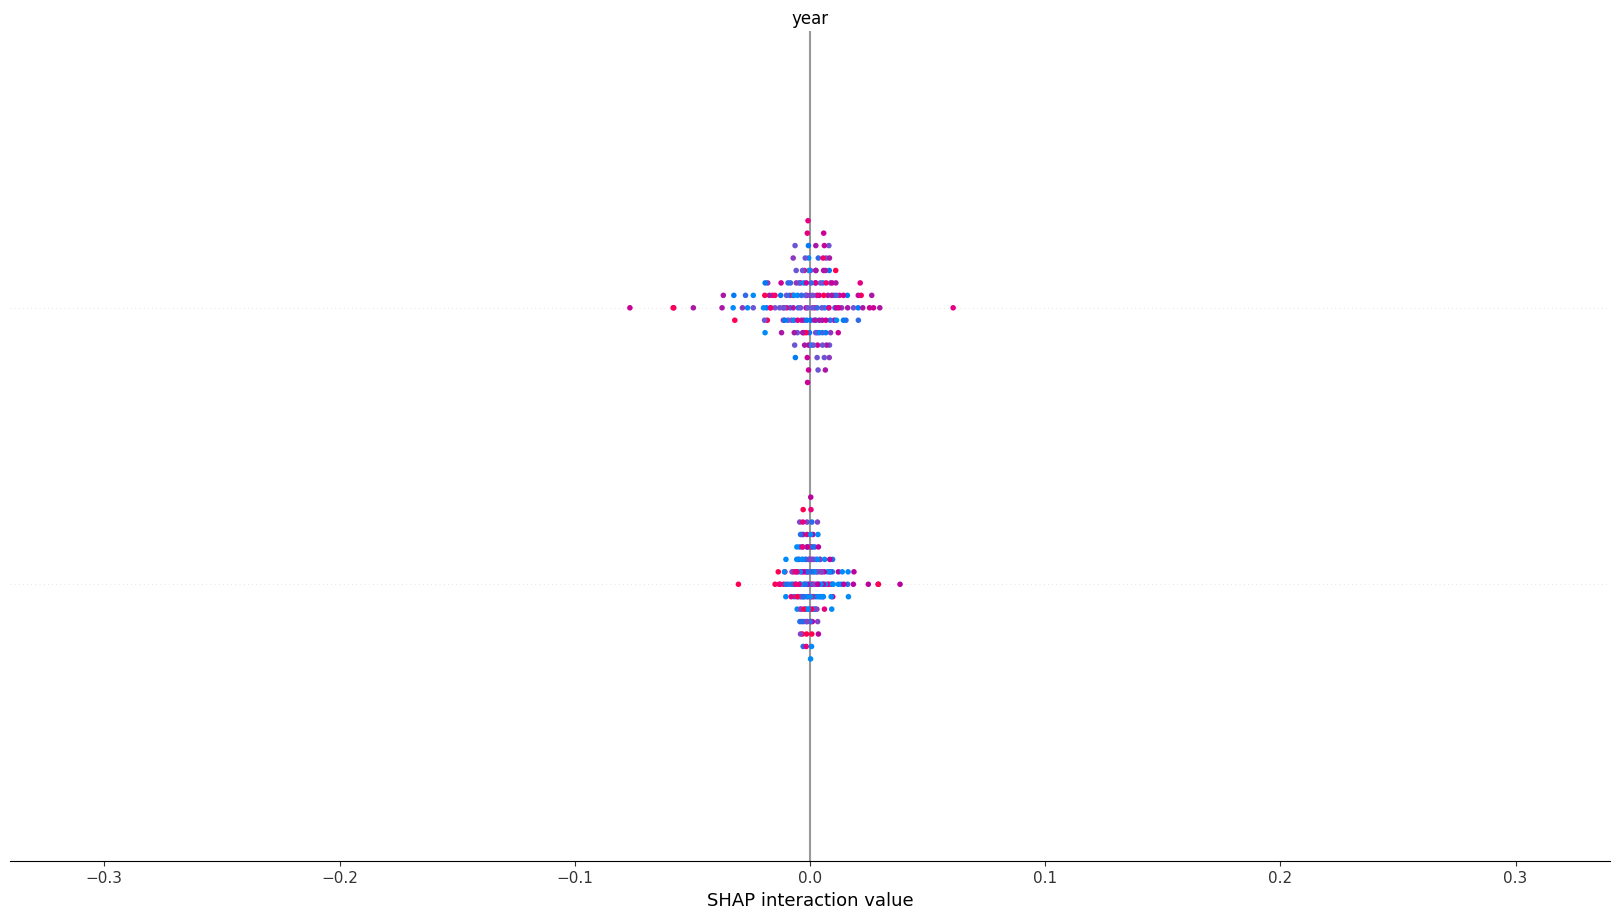

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 1. Data Preparation
X2.columns = [str(col) for col in X2.columns]
x_train, x_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, stratify=Y2, random_state=42)

# 2. Model Training
model = RandomForestClassifier(n_estimators=200, max_depth=170, max_features=11, random_state=42)
model.fit(x_train, y_train)

# 3. SHAP Analysis
explainer = shap.TreeExplainer(model)  # More efficient for tree models
shap_values = explainer.shap_values(x_test)

# 4. Visualization - Three Options:

# Option 1: Global Feature Importance (as in your code)
if isinstance(shap_values, list):
    # Multiclass: average absolute SHAP across all classes
    global_shap = np.mean([np.abs(sv).mean(0) for sv in shap_values], axis=0)
else:
    # Binary/regression
    global_shap = np.abs(shap_values).mean(0)

shap.summary_plot(shap_values, x_test, plot_type="bar", max_display=10)



In [ ]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

def plot_shap_feature_importance(model, X, max_display=15, class_index=None):
    """
    Plot SHAP feature importance for any sklearn tree-based model

    Parameters:
    model: Trained tree-based model (RandomForest, XGBoost, etc.)
    X: Pandas DataFrame of features
    max_display: Number of top features to show
    class_index: For multiclass, which class to explain (None for average)
    """
    # Create SHAP explainer
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)

    # Debug prints to understand SHAP values structure
    print(f"SHAP values type: {type(shap_values)}")
    if isinstance(shap_values, list):
        print(f"Number of classes: {len(shap_values)}")
        print(f"SHAP shape for first class: {shap_values[0].shape}")
    else:
        print(f"SHAP values shape: {shap_values.shape}")

    # Process SHAP values based on type
    if isinstance(shap_values, list):
        # Multiclass case
        if class_index is not None:
            # Use specific class
            mean_shap = np.mean(np.abs(shap_values[class_index]), axis=0)
        else:
            # Average across all classes
            mean_shap = np.mean([np.mean(np.abs(sv), axis=0) for sv in shap_values], axis=0)
    else:
        # Binary case
        mean_shap = np.mean(np.abs(shap_values), axis=0)

    # Ensure we have a 1D array
    mean_shap = np.asarray(mean_shap).flatten()

    # Create DataFrame with proper 1D arrays
    importance_df = pd.DataFrame({
        'Feature': X.columns.tolist(),
        'SHAP Importance': mean_shap.tolist()
    }).sort_values('SHAP Importance', ascending=False)

    # Plotting
    plt.figure(figsize=(10, min(max_display/2, 10)))
    ax = importance_df.head(max_display).plot(
        kind='barh',
        x='Feature',
        y='SHAP Importance',
        color='#1f77b4',
        legend=False
    )

    plt.title(f"Top {max_display} Feature Importance", fontsize=14, pad=20)
    plt.xlabel("Mean |SHAP Value|", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    ax.invert_yaxis()

    # Clean up borders
    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)

    plt.grid(axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    return importance_df

# Usage example:
# model = RandomForestClassifier().fit(X_train, y_train)
# feature_importance_df = plot_shap_feature_importance(model, X_test, max_display=15)

In [ ]:
import shap
import xgboost
from sklearn.datasets import load_boston  # or any dataset of your choice
import matplotlib.pyplot as plt

# Load example dataset
X, y = load_boston(return_X_y=True)
feature_names = load_boston().feature_names

# Train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

# Create SHAP explainer
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Plot SHAP bar graph of feature importance
shap.plots.bar(shap_values, max_display=10)


#ELI5

In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=a634101a74bd7a25105a32905579d8a65f038e6e7edaadaaf64a02bb3ad5da1d
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import eli5

# Fit a random forest classifier to the data
clf = RandomForestClassifier(max_depth=11, max_features=3, min_samples_split = 10)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
test_score = (metrics.accuracy_score(y_test, y_pred))
f1 = (sklearn.metrics.f1_score(y_test, y_pred))
p =(sklearn.metrics.precision_score(y_test, y_pred))
r = (sklearn.metrics.recall_score(y_test, y_pred))
print(f1)
print(p)
print(r)
print(test_score)
# Compute feature importance using ELI5
eli5.show_weights(clf, feature_names=list(X_train.columns))

0.8387096774193549
0.7697368421052632
0.9212598425196851
0.7471910112359551


In [ ]:
from eli5.sklearn import PermutationImportance

# Compute permutation importance using ELI5
perm = PermutationImportance(clf).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=list(X_test.columns))

In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=1e7a57080174a8ef9b50d4e4cd09786edfa116827cb9275fc9d4378328d10a48
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


#LIME

In [ ]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_test),

    feature_names=X_train.columns,
    class_names=[0,1],
    mode='classification'
)

In [ ]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[11],
    predict_fn=clf.predict_proba
)

exp.show_in_notebook(show_table=True)
exp.save_to_file('Dataset1lime1.html')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[17],
    predict_fn=clf.predict_proba
)

exp.show_in_notebook(show_table=True)
exp.save_to_file('Dataset2lime2.html')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.5 MB/s eta 0:00:00


#SHAP Final Graph

In [ ]:
import shap

In [ ]:
24# creating an explainer for our model
explainer = shap.TreeExplainer(clf)

# finding out the shap values using the explainer
shap_values = explainer.shap_values(x_test)

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
#print('Expected Value:', explainer.expected_value)

# displaying the first 5 rows of the shap values table


<Figure size 640x480 with 0 Axes>

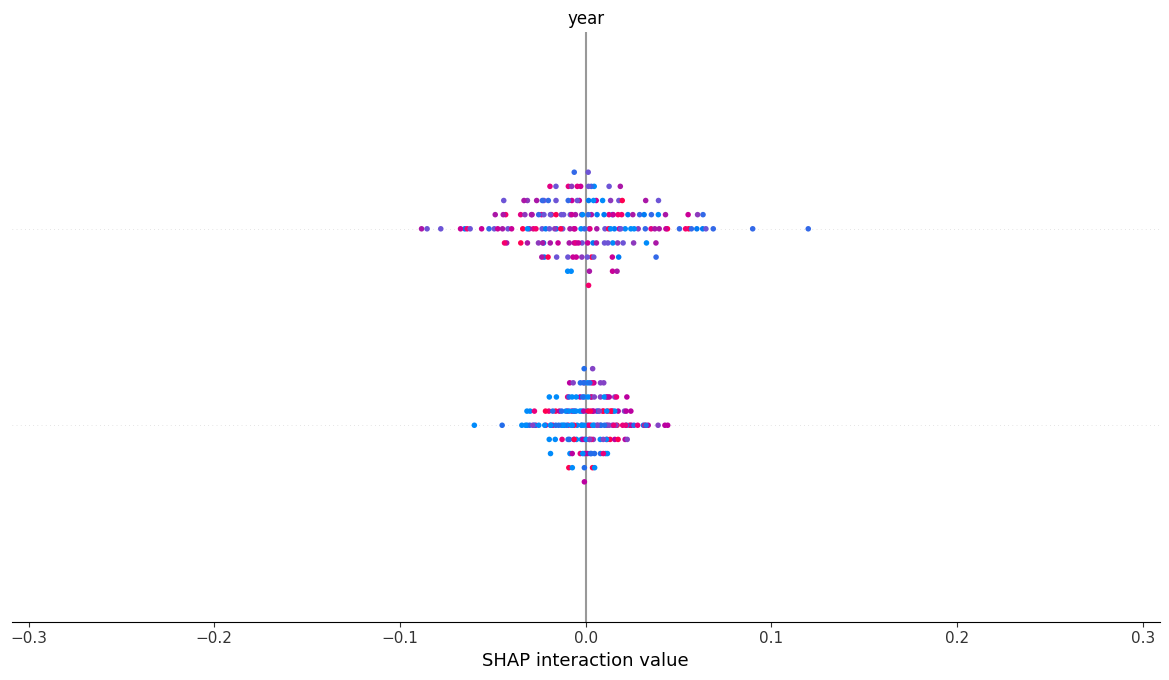

In [ ]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(x_test,approximate=True)
shap.summary_plot(shap_values, x_test, plot_type="bar")

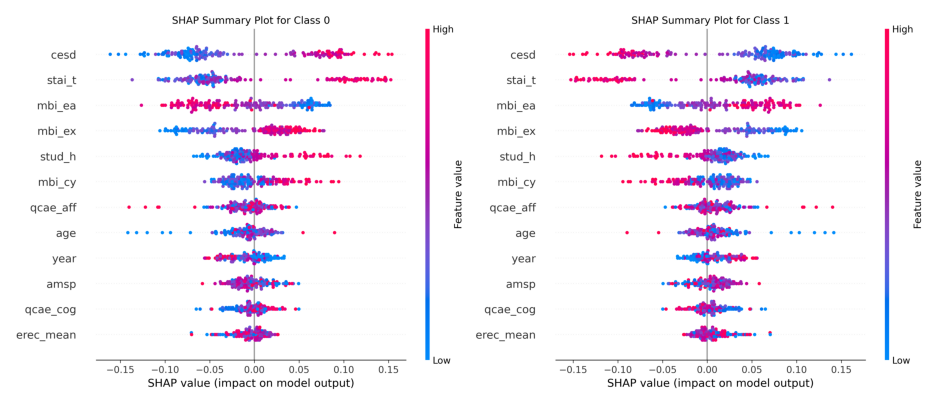

In [ ]:
import shap
import matplotlib.pyplot as plt
from PIL import Image

# Assuming shap_values and x_test are already defined
# shap_values shape: (n_samples, n_features, n_classes)
# x_test shape: (n_samples, n_features)

# Save individual SHAP summary plots
for i in range(2):  # Assuming 3 classes
    shap.summary_plot(shap_values[:, :, i], x_test, max_display= 12, show=False)
    plt.title(f"SHAP Summary Plot for Class {i}")
    plt.savefig(f"shap_class_{i}.png", bbox_inches="tight", dpi=300)
    plt.close()

# Combine the saved images into one figure
images = [Image.open(f"shap_class_{i}.png") for i in range(2)]

# Calculate the total width and maximum height
total_width = sum(img.width for img in images)
max_height = max(img.height for img in images)

# Create a new blank image to hold the combined plots
combined_image = Image.new("RGB", (total_width, max_height))

# Paste each image side by side
x_offset = 0
for img in images:
    combined_image.paste(img, (x_offset, 0))
    x_offset += img.width

# Save the combined image
combined_image.save("combined_shap_plots.png")

# Display the combined image using matplotlib
plt.figure(figsize=(15, 5))
plt.imshow(combined_image)
plt.axis("off")  # Hide axes
plt.show()

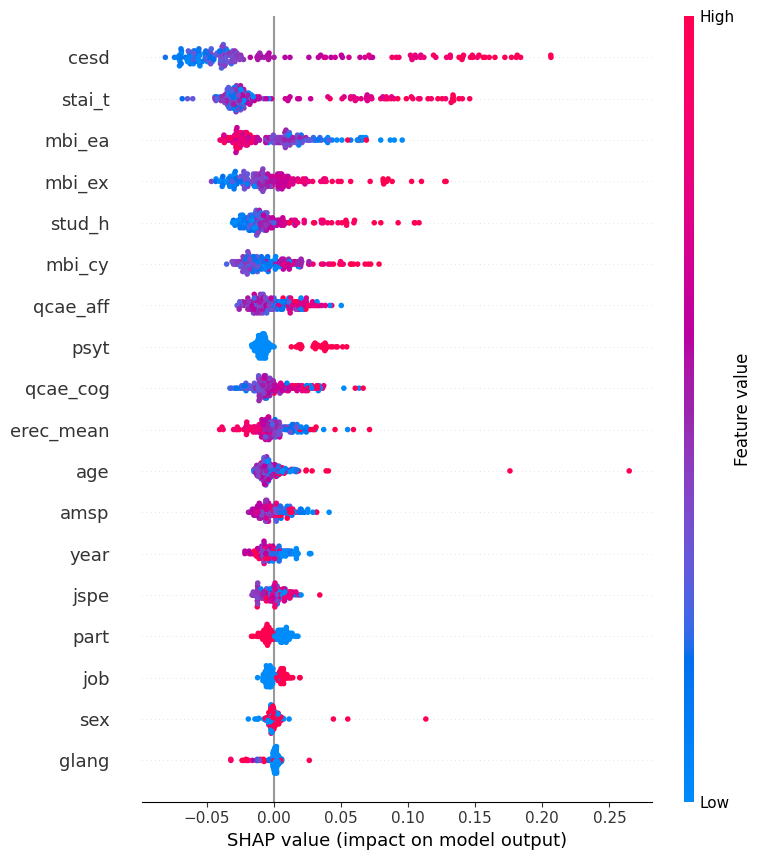

In [ ]:
shap.summary_plot(shap_values[0], X_test.values, feature_names = X_test.columns)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


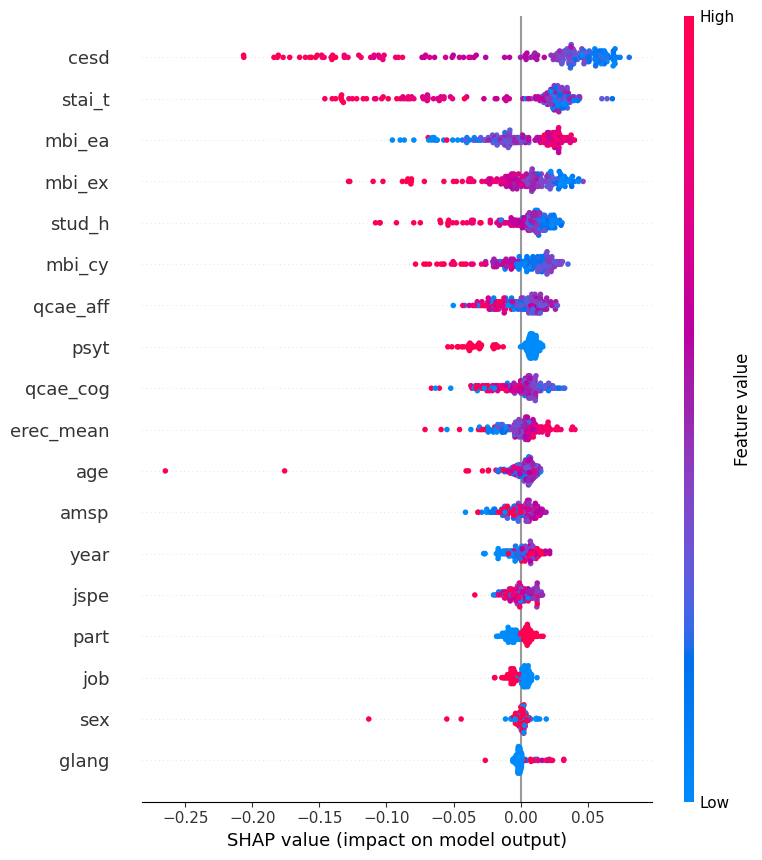

In [ ]:
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

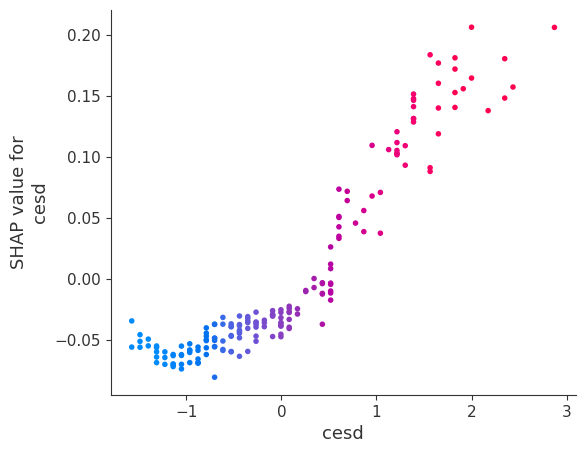

In [ ]:
shap.dependence_plot(ind='cesd', interaction_index='cesd',
                     shap_values=shap_values[0],
                     features=X_test)

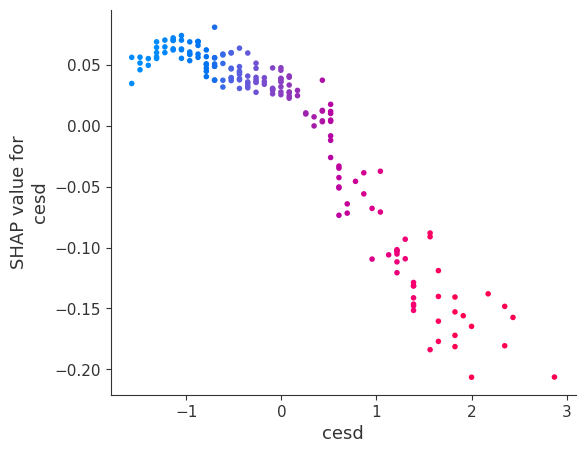

In [ ]:
shap.dependence_plot(ind='cesd', interaction_index='cesd',
                     shap_values=shap_values[1],
                     features=X_test)

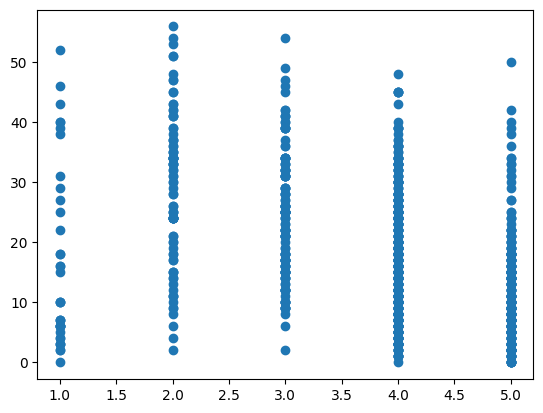

In [ ]:
import matplotlib.pyplot as plt



plt.scatter(y = 'cesd', x = 'health' , data = df)
plt.show()

In [ ]:
shap.initjs()
i = 8
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X2.values[i], feature_names = X2.columns)

In [ ]:
shap.initjs()
i = 35
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X2.values[i], feature_names = X2.columns)